# PHYS591000 in 2022
# Lab 04
---
## Goal 
In lab 04, you will practice data preprocessing and unsupervised learning  
* Load data from pickle file.
* Spilt the useful data from the file.
* Filter the effective data.
* Data visualze and clustering using unsupervised learning(k-means).   
* Compare with supervised learning kNN.
---
## Unsupervised learning
* We will use the data of the different star to be example.
* We will learn the method of k-means clustering.
* Try to visulize the result and check the performance of the model.

> **Useful Reference**
> 1. [Understanding K-means Clustering in Machine Learning](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)
> 2. [k-means example](https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E9%9B%86%E7%BE%A4%E5%88%86%E6%9E%90-k-means-clustering-e608a7fe1b43)

---
## Data Introduction  
[Spitzer From Molecular Cores to Planet-Forming Disks (C2D) Project](https://irsa.ipac.caltech.edu/data/SPITZER/C2D/index.html)  
* We will take the spectrum energy density data from "Spitzer From Molecular Cores to Planet-Forming Disks (C2D)" project in this week.

* The spectrum energy data contains three Spitzer instruments (IRAC, MIPS, and IRS).

    * x_data : 16 features
        * 0~7 : spectrum energy distribution (SED) for J, H, K, IRAC1, IRAC2, IRAC3, IRAC4, MIPS1.
        * 8~15 : detection error for J, H, K, IRAC1, IRAC2, IRAC3, IRAC4, MIPS1.

    * y_data : one-hot labels (0: star, 1: galaxy, 2: young stellar object).
---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phys591000-2022-week04/c2d_yso.pickle


## Lab 4
---

## Preprocessing

### 1.1  
* Load the pickle file `/kaggle/input/phys591000-2022-week03/c2d_yso.pickle`.  
* Pick up `x_data` and `y_data` arrays.  
* Print out the shape of arrays to check the data structure.  
* Hint: You should import the useful package yourself.  

[Ref: pickle](https://docs.python.org/3/library/pickle.html)  
[Ref: numpy](https://numpy.org/)   

In [2]:
##############################################################################
# Code for 1.1
# 
##############################################################################
# Please code in this cell

# loading the pickle file
file = open('../input/phys591000-2022-week04/c2d_yso.pickle','rb')
rawdata = pickle.load(file)
x_data = rawdata['x_data']
y_data = rawdata['y_data']

# print the shape of them
print(f'x_data.shape = {x_data.shape}')
print(f'y_data.shape = {y_data.shape}')

##############################################################################

x_data.shape = (81436, 16)
y_data.shape = (81436, 3)


* Filter the data and see the shape of arrays.

In [3]:
for i in range(16):
    filter = np.where(x_data[:,i] < 50)[0]  
    x_data = x_data[filter]
    y_data = y_data[filter]
print(x_data.shape, y_data.shape)

(77476, 16) (77476, 3)


### 1.2  
* Put types label in a type list.  
    * Original one-hot label: star[100],galaxy[010],yso[001]  
    * Turn the type-distribution list from one-hot-code to array of label 0,1,2.  
* Print out the type list length.  
* Make the list to a numpy array and reshape to (length of type list , 1).  
* Print out the array shape.
* Hint: See the y_data first and choose the max column number of each row.  
* Use to separate the data easyly.(EX: for plot)  
 
[Ref: list.append](TBA)  
[Ref: np.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)  
[Ref: np.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html)  
[Ref: np.array.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)  
[Ref: 初學Python手記#3-資料前處理( Label encoding、 One hot encoding)](https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87)  
[Ref: One-hot](https://en.wikipedia.org/wiki/One-hot)  

In [4]:
##############################################################################
# Code for 1.2
# 
##############################################################################
# Please code in this cell

# Turn the type-distribution list from "one-hot-code" to array of "label 0,1,2"
y_label = y_data.argmax(1)
print("The type list length is", y_label.shape[0])

# Make the list to a numpy array and reshape to (length of type list , 1).
y_label = y_label.reshape(-1,1)
print("The array shape is", y_label.shape)

##############################################################################

The type list length is 77476
The array shape is (77476, 1)


### 1.3  
* Split the data to star(label 0), galaxy(label 1) and yso(label 2) for x_data and y_data both.  
* Print out the data structure.  
 
[Ref: np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html)  

In [5]:
##############################################################################
# Code for 1.3
# 
##############################################################################
# Please code in this cell

L = ['star','galaxy','yso']
nx_data = []
ny_data = []
for i in range(3):
    nx_data.append(x_data[y_label[:,0]==i])
    ny_data.append(y_data[y_label[:,0]==i])
    print(f"The data structure for {L[i]} is ",nx_data[i].shape)

#print(nx_data)
#print(ny_data)
##############################################################################

The data structure for star is  (76396, 16)
The data structure for galaxy is  (759, 16)
The data structure for yso is  (321, 16)


### 1.4  
* Balance the number of data for x_data and y_data both.(random choose)  
    * Hint: make the data number of star to mean of galaxy and yso.
* Combine the three kind of data to new x_data and y_data.  
* Print out the data structure after balance.(With string to discribe is better.)  
* Print out the shape of x_data and y_data.
 
[Ref: random.sample](https://docs.python.org/3/library/random.html)  
[Ref: np.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html)  

In [6]:
##############################################################################
# Code for 1.4
# 
##############################################################################
# Please code in this cell

# Get the data number of mean between galaxy and yso
num = (ny_data[1].shape[0]+ny_data[2].shape[0])//2

# Balance the number of star type
np.random.seed(1)
filt = np.random.choice(range(ny_data[0].shape[0]),size = num,replace = False)
nx_data[0] = nx_data[0][filt]
ny_data[0] = ny_data[0][filt]

# Combine the three kind of data
new_x_data = np.r_[nx_data[0],nx_data[1],nx_data[2]]
new_y_data = np.r_[ny_data[0],ny_data[1],ny_data[2]]
new_y_label = new_y_data.argmax(1)
new_y_label = new_y_label.reshape(-1,1)


# print the data structure of balance data
for i in range(3):
    print(f"The data structure for {L[i]} is ",nx_data[i].shape)

# print the data structure of new data
print("The shape of new x_data is ", new_x_data.shape)
print("The shape of new y_data is ", new_y_data.shape)

##############################################################################

The data structure for star is  (540, 16)
The data structure for galaxy is  (759, 16)
The data structure for yso is  (321, 16)
The shape of new x_data is  (1620, 16)
The shape of new y_data is  (1620, 3)


### 1.5  
Discussion
1. Describe why need to filter the data.  
2. Describe why need to balance the number of three types of data.
---
Please write your discussion in this cell:

1. For telescope, the image may encounter overexposure.<br>
   The overexposure will let spectrum energy become more over than it actually is, especially for Spitzer telescope.<br>
   Spitzer is a space telescope, whose CCD collector will get the noise from cosmic ray.<br>
   The background light of galaxy may also overlap the target to make its signal over it actually is.
   
2. To avoid whole data mainly cover by one type of data.<br>
   Beacuse the KMeans clustering classify data by the distance between data points and chosen center.<br>
   If the whole scope of our data has this type of data, KMeans method will easily fail to classify them to other type, since KMeans will identify data to the closer center (i.e. by shorter distance).

### 1.6  
* Draw the histagram of x_data for each feature with legend and title.
* Hint: You should show 16 pictures.
 
[Ref: matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)  
[Ref: plt.hist](TBA)  
[Ref: plt.title](TBA)  
[Ref: plt.lengend](TBA)  
[Ref: plt.show](TBA)  

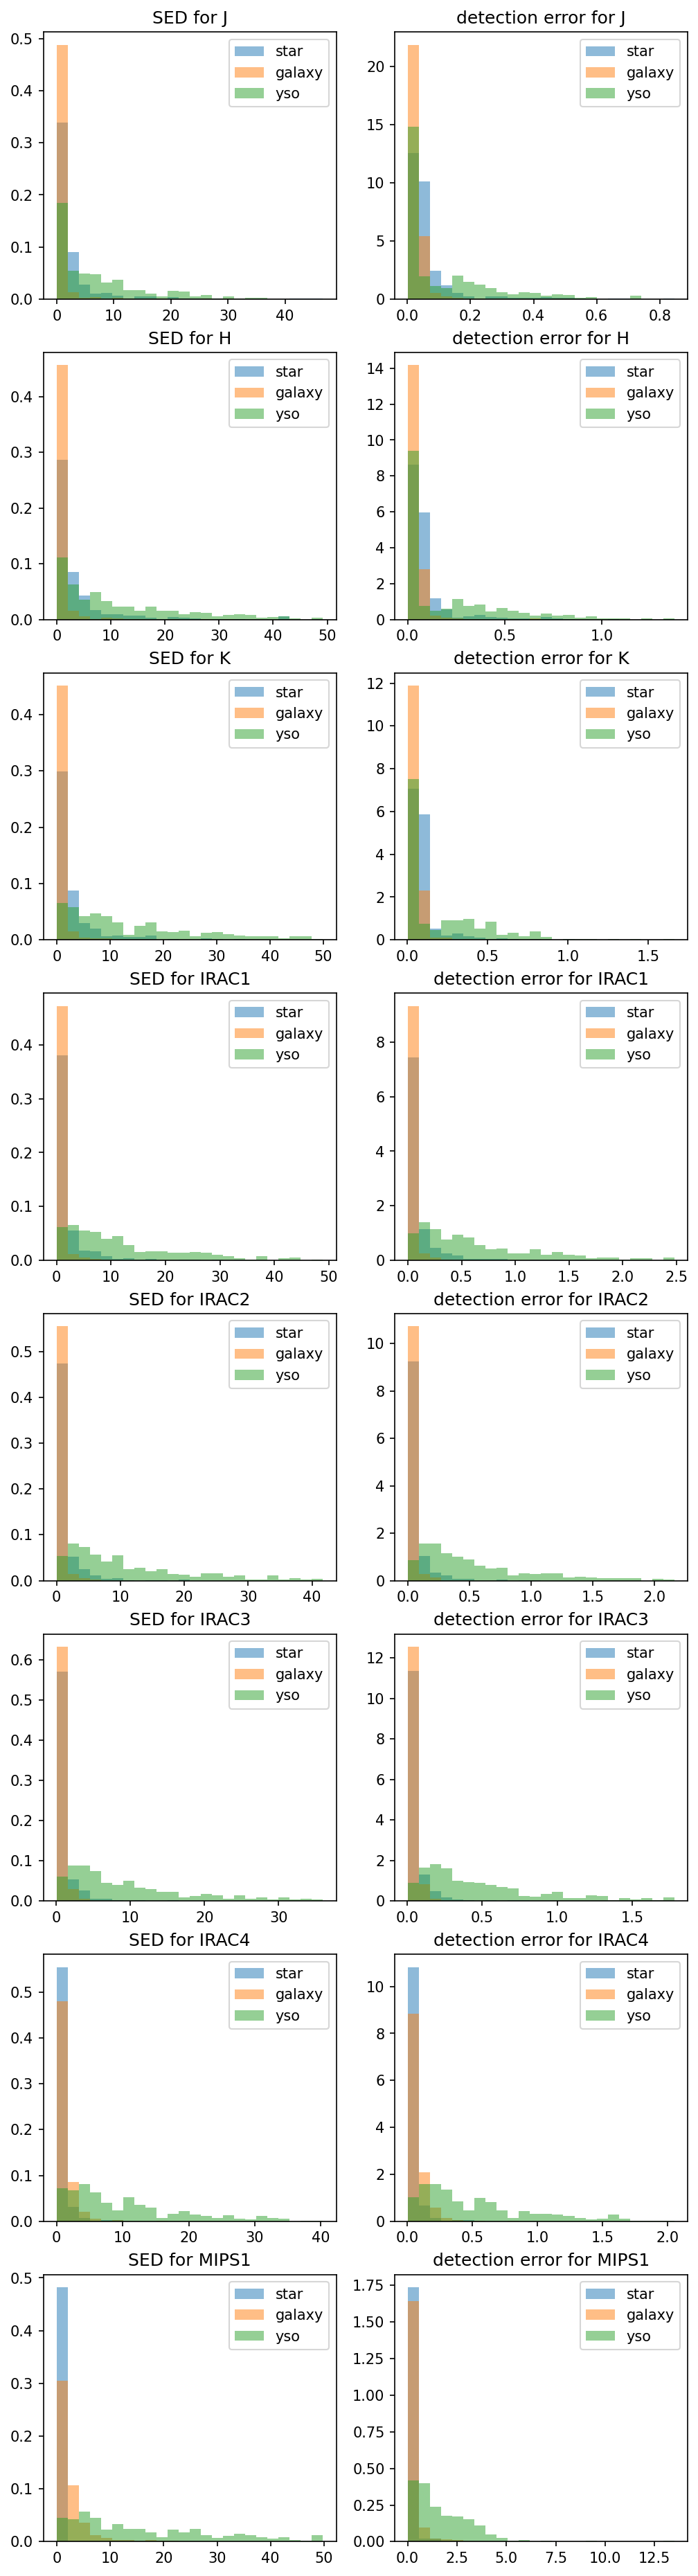

In [7]:
##############################################################################
# Code for 1.6
# 
##############################################################################
# Please code in this cell

# target list
tj = ['J', 'H', 'K', 'IRAC1', 'IRAC2', 'IRAC3', 'IRAC4', 'MIPS1']
ti = ['SED for ','detection error for ']

# plot!!!
fig,ax = plt.subplots(8,2,figsize =(8,32),dpi = 150)
for i in range(2):
    for j in range(8):
        bins = np.linspace(new_x_data[:,8*i+j].min(), new_x_data[:,8*i+j].max(), 25)
        ax[j][i].hist(new_x_data[new_y_data[:,0]==1][:,8*i+j],alpha = 0.5,bins = bins,label = L[0],density=True)
        ax[j][i].hist(new_x_data[new_y_data[:,1]==1][:,8*i+j],alpha = 0.5,bins = bins,label = L[1],density=True)
        ax[j][i].hist(new_x_data[new_y_data[:,2]==1][:,8*i+j],alpha = 0.5,bins = bins,label = L[2],density=True)
        ax[j][i].set_title(ti[i]+tj[j])
        ax[j][i].legend()
plt.show()
##############################################################################

## KMeans

### 1.7  
* Use KMeans clustering to cluster the data with feature 7 and 12.  
* Pick up the results(labels).  
* Print out the shape of results.  
* Hint: You should pick out columns 7 and 12 from x_data first.  
 
[Ref: sklearn](https://scikit-learn.org/stable/)  
[Ref: sklearn.cluster](https://scikit-learn.org/stable/modules/clustering.html)  
[Ref: sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)  

In [8]:
##############################################################################
# Code for 1.7
# 
##############################################################################
# Please code in this cell

from sklearn.cluster import KMeans

# Try K-means with 3 clusters
x_train = new_x_data[:,[7,12]]
kmeans = KMeans(n_clusters=3, random_state=0).fit(x_train)
kmean_output = kmeans.labels_
print('KMeans label shape is:', kmean_output.shape)
# Take a look at the first five entries of labels
print('KMeans label looks like:', kmean_output[0:6])

##############################################################################

KMeans label shape is: (1620,)
KMeans label looks like: [0 0 0 0 0 0]


### 1.8  
* Visulize the cluster results.  
* Plot the ground truth and labels on the same pictute.(x-axis for feature7;y-axis for feature 12)  
* Hint: Spilt the data for different label.
* Hint: Use differnt color and label to distinguish the different meanings.  
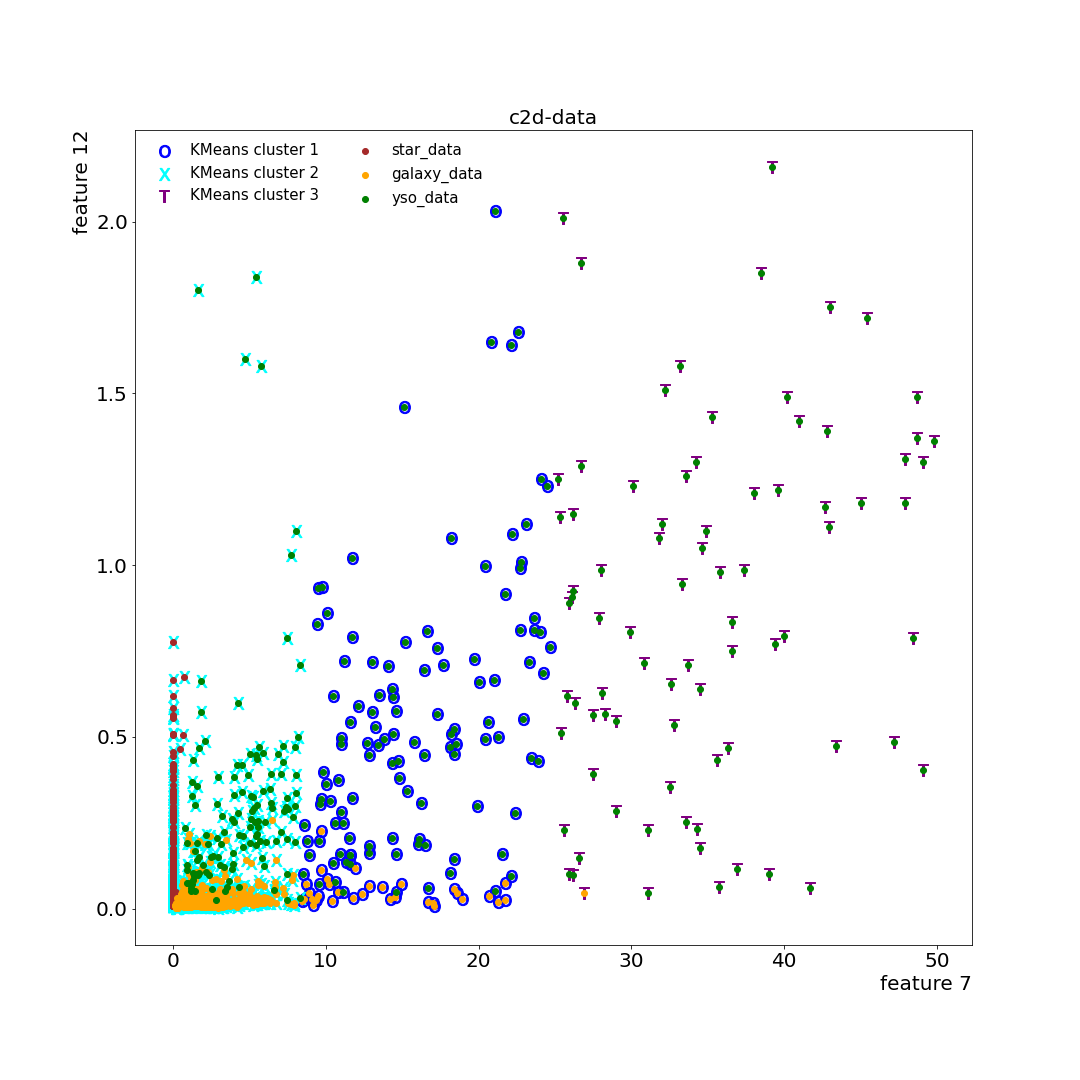

[Ref: matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)  
[Ref: plt.subplots](TBA)  
[Ref: plt.scatter](TBA)  
[Ref: plt.title](TBA)  
[Ref: plt.legend](TBA)  
[Ref: plt.show](TBA)  
[Ref: ax.tick_params](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)  

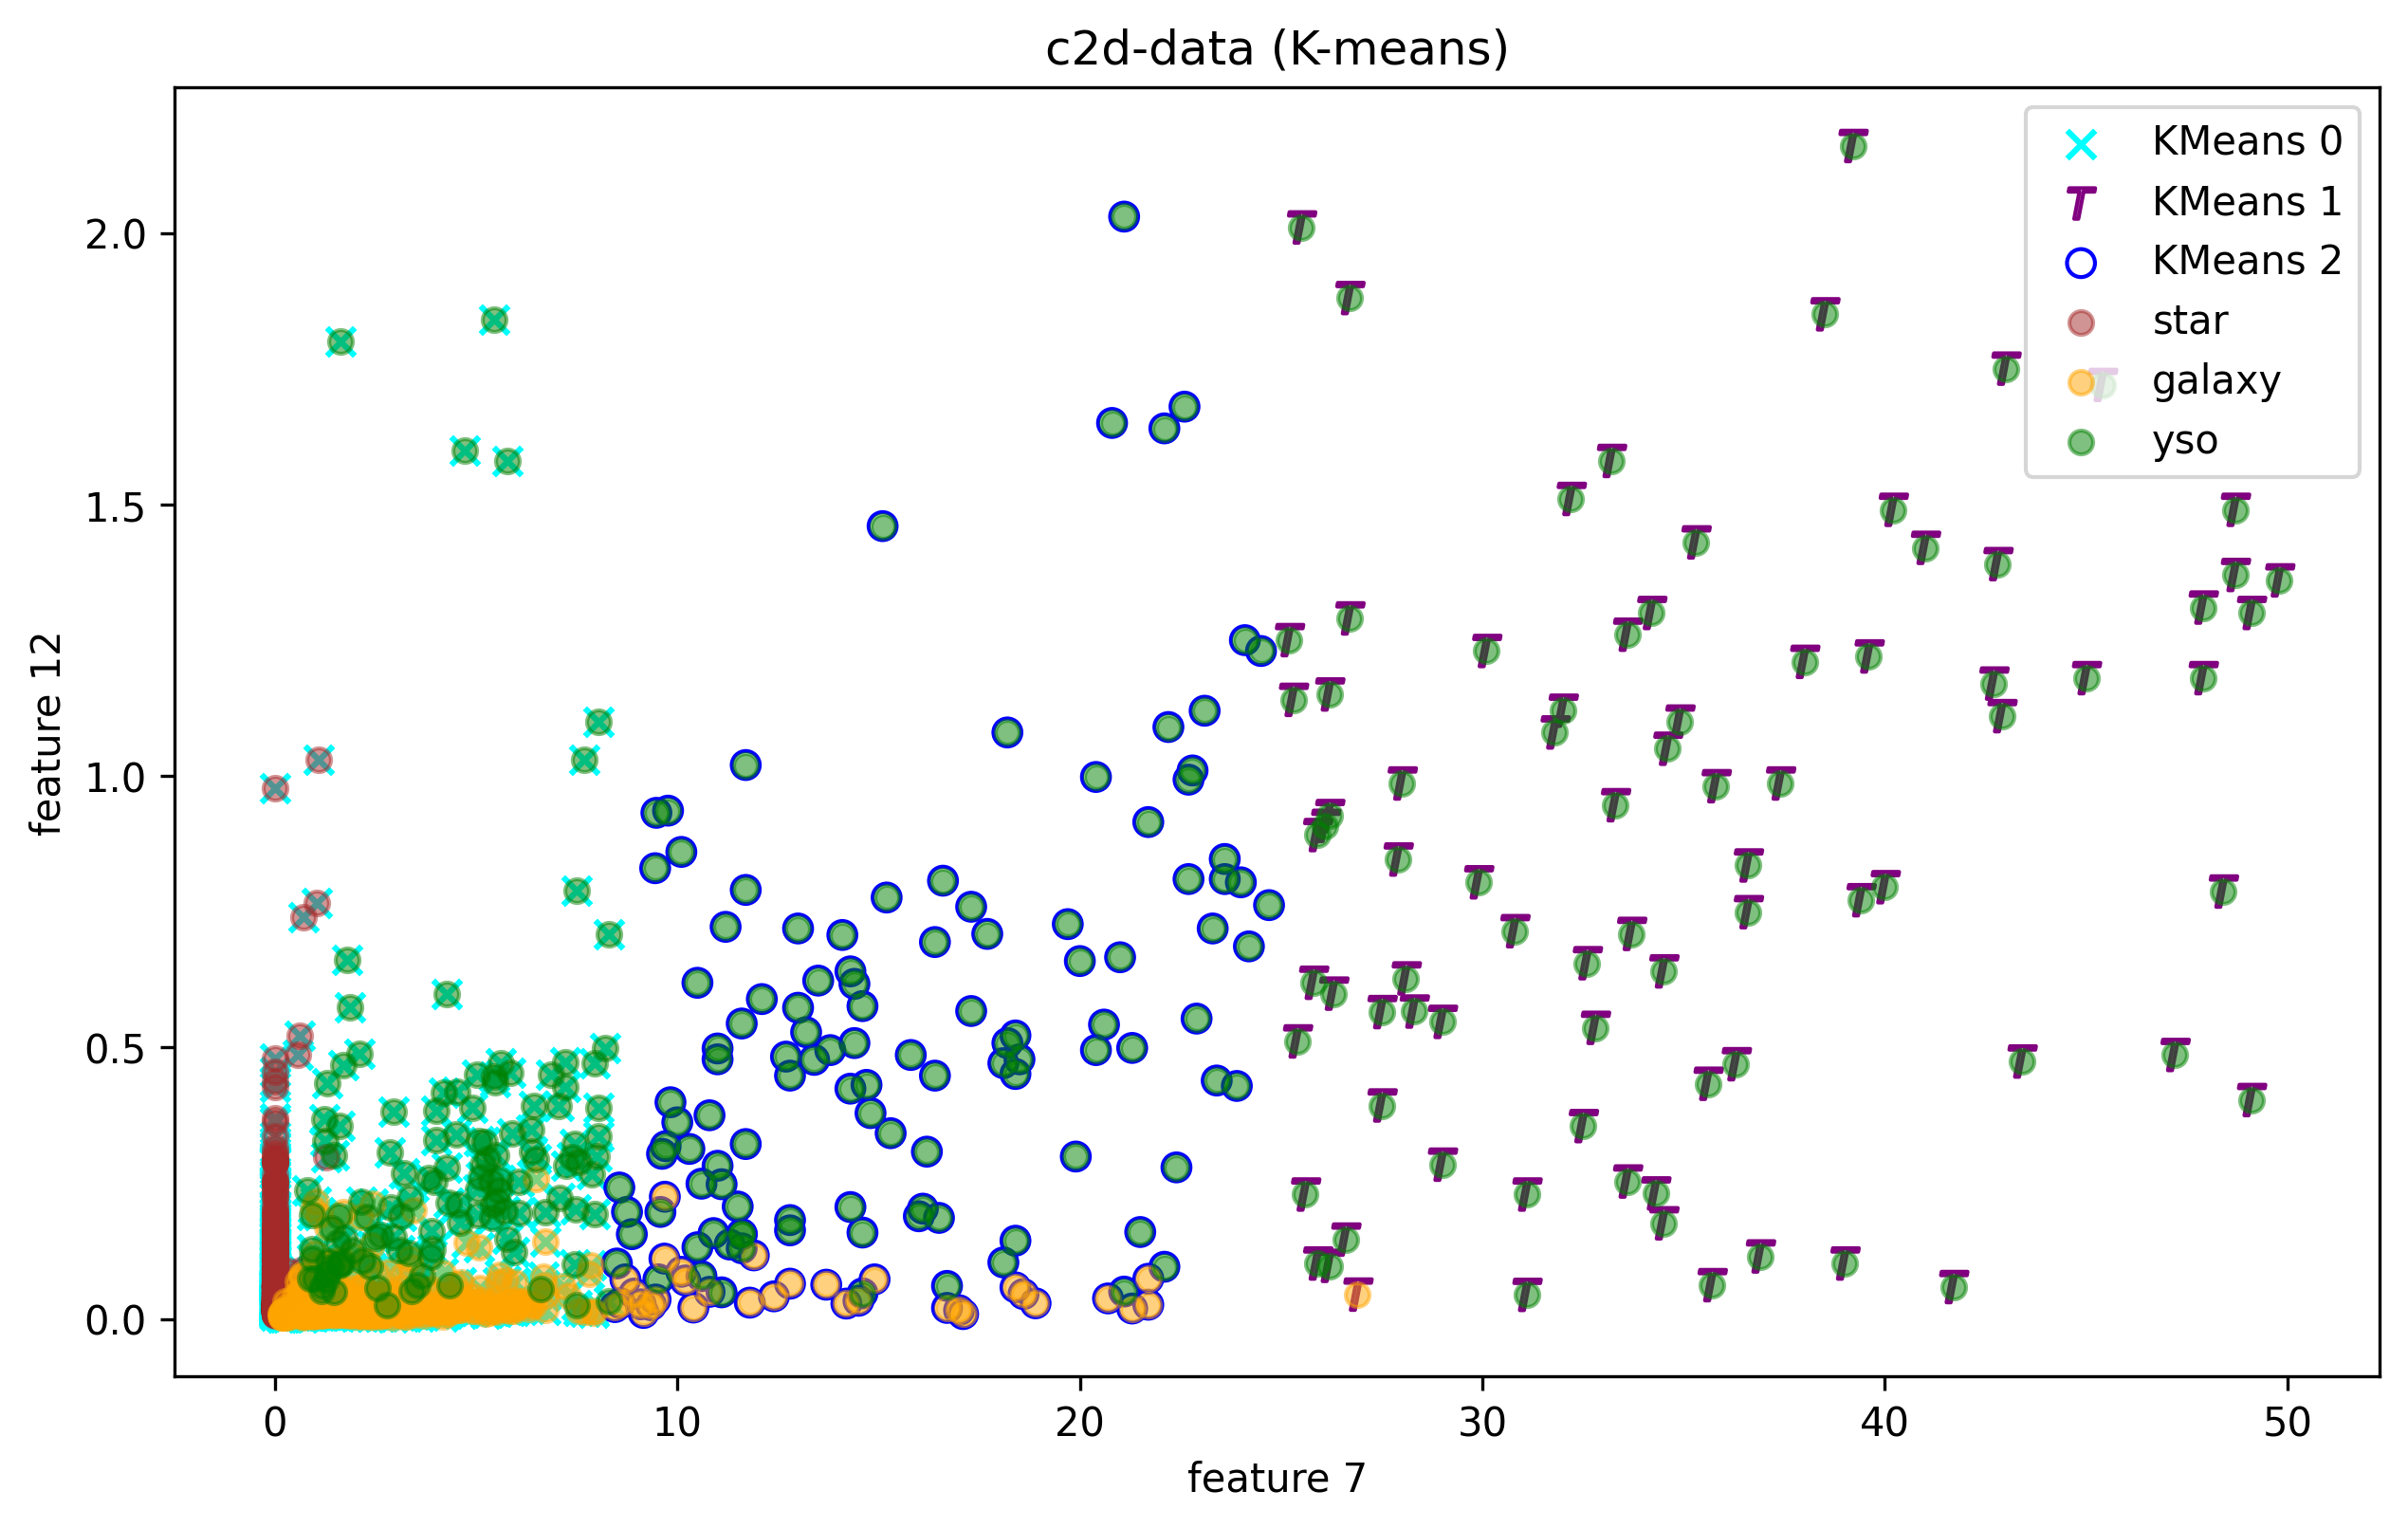

In [9]:
##############################################################################
# Code for 1.8
# 
##############################################################################
# Please code in this cell

fig = plt.figure(figsize=(10,6), dpi=300)  
plt.title("c2d-data (K-means)")

plt.scatter(x_train[:,0][kmean_output==0], x_train[:,1][kmean_output==0],s=50,marker='x',c='cyan', label='KMeans 0')
plt.scatter(x_train[:,0][kmean_output==1], x_train[:,1][kmean_output==1],s=60,marker='$T$',c='none',edgecolors='purple', label='KMeans 1')
plt.scatter(x_train[:,0][kmean_output==2], x_train[:,1][kmean_output==2],s=50,marker='o',c='none',edgecolors='blue', label='KMeans 2')
plt.scatter(x_train[:,0][new_y_data[:,0]==1], x_train[:,1][new_y_data[:,0]==1], alpha=.5, color='brown', label=L[0])
plt.scatter(x_train[:,0][new_y_data[:,1]==1], x_train[:,1][new_y_data[:,1]==1], alpha=.5, color='orange', label=L[1])
plt.scatter(x_train[:,0][new_y_data[:,2]==1], x_train[:,1][new_y_data[:,2]==1], alpha=.5, color='g', label=L[2])
plt.xlabel('feature 7')
plt.ylabel('feature 12')
plt.legend()
plt.show()

##############################################################################

### 1.9  
Discussion for 1.6 and 1.8
1. Describe the figures in 1.6.(What do you find in the figures?)  
2. Describe the figure in 1.8.
---
Please write your discussion in this cell:

1. In 1.6, we see that three types of data provide different distribution.<br>
   For the star (blue one) type, they are distributed in a small range with low energy density,
   while for the yso (orange one) type, their energy density distributed relatively more divergent.
   So we can find yso in many different energy levels, but only can get star in few levels.<br>
   (The galaxy type's distrubution is relatively middle, not so converge but not diverge yet.)
 
   
2. In 1.8, the c2d data plot show the Kmeans cluster don't classify our data well.<br>
   The figure shows that each cluster is classifed with a supposed center point, so clusters distribute like three parts of region divided in x axis.

## kNN  

### 2.1  
* Split the data to train set and test set.(test_size=0.2)  
    * Hint: Split the data after filter and balance.  
* Build up a kNN model and train it.  
* Predict the test data.  
* Plot the confusion matrix.  

[Ref: sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)  
[Ref: sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)  
[Ref: sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)  
[Ref: plt.matshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html)  

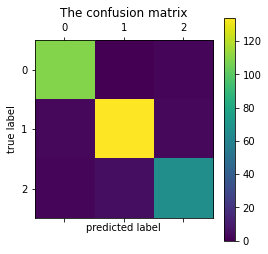

In [10]:
##############################################################################
# Code for 2.1
# 
##############################################################################
# Please code in this cell

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(new_x_data, new_y_data.argmax(1), test_size=0.2, random_state=880301)

# train the model
neigh = KNeighborsClassifier()
neigh.fit(X_train, Y_train)
# do prediction
p_test = neigh.predict(X_test)

conf_mat = confusion_matrix(Y_test, p_test)

plt.matshow(conf_mat)
plt.colorbar()
plt.title('The confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
##############################################################################

### 2.2  
* Visualize the results of test data.  
    * Hint: Use different labels to mark the nodes.

[Ref: matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)  
[Ref: plt.subplots](TBA)  
[Ref: plt.scatter](TBA)  
[Ref: plt.title](TBA)  
[Ref: plt.legend](TBA)  
[Ref: plt.show](TBA)  
[Ref: ax.tick_params](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)  

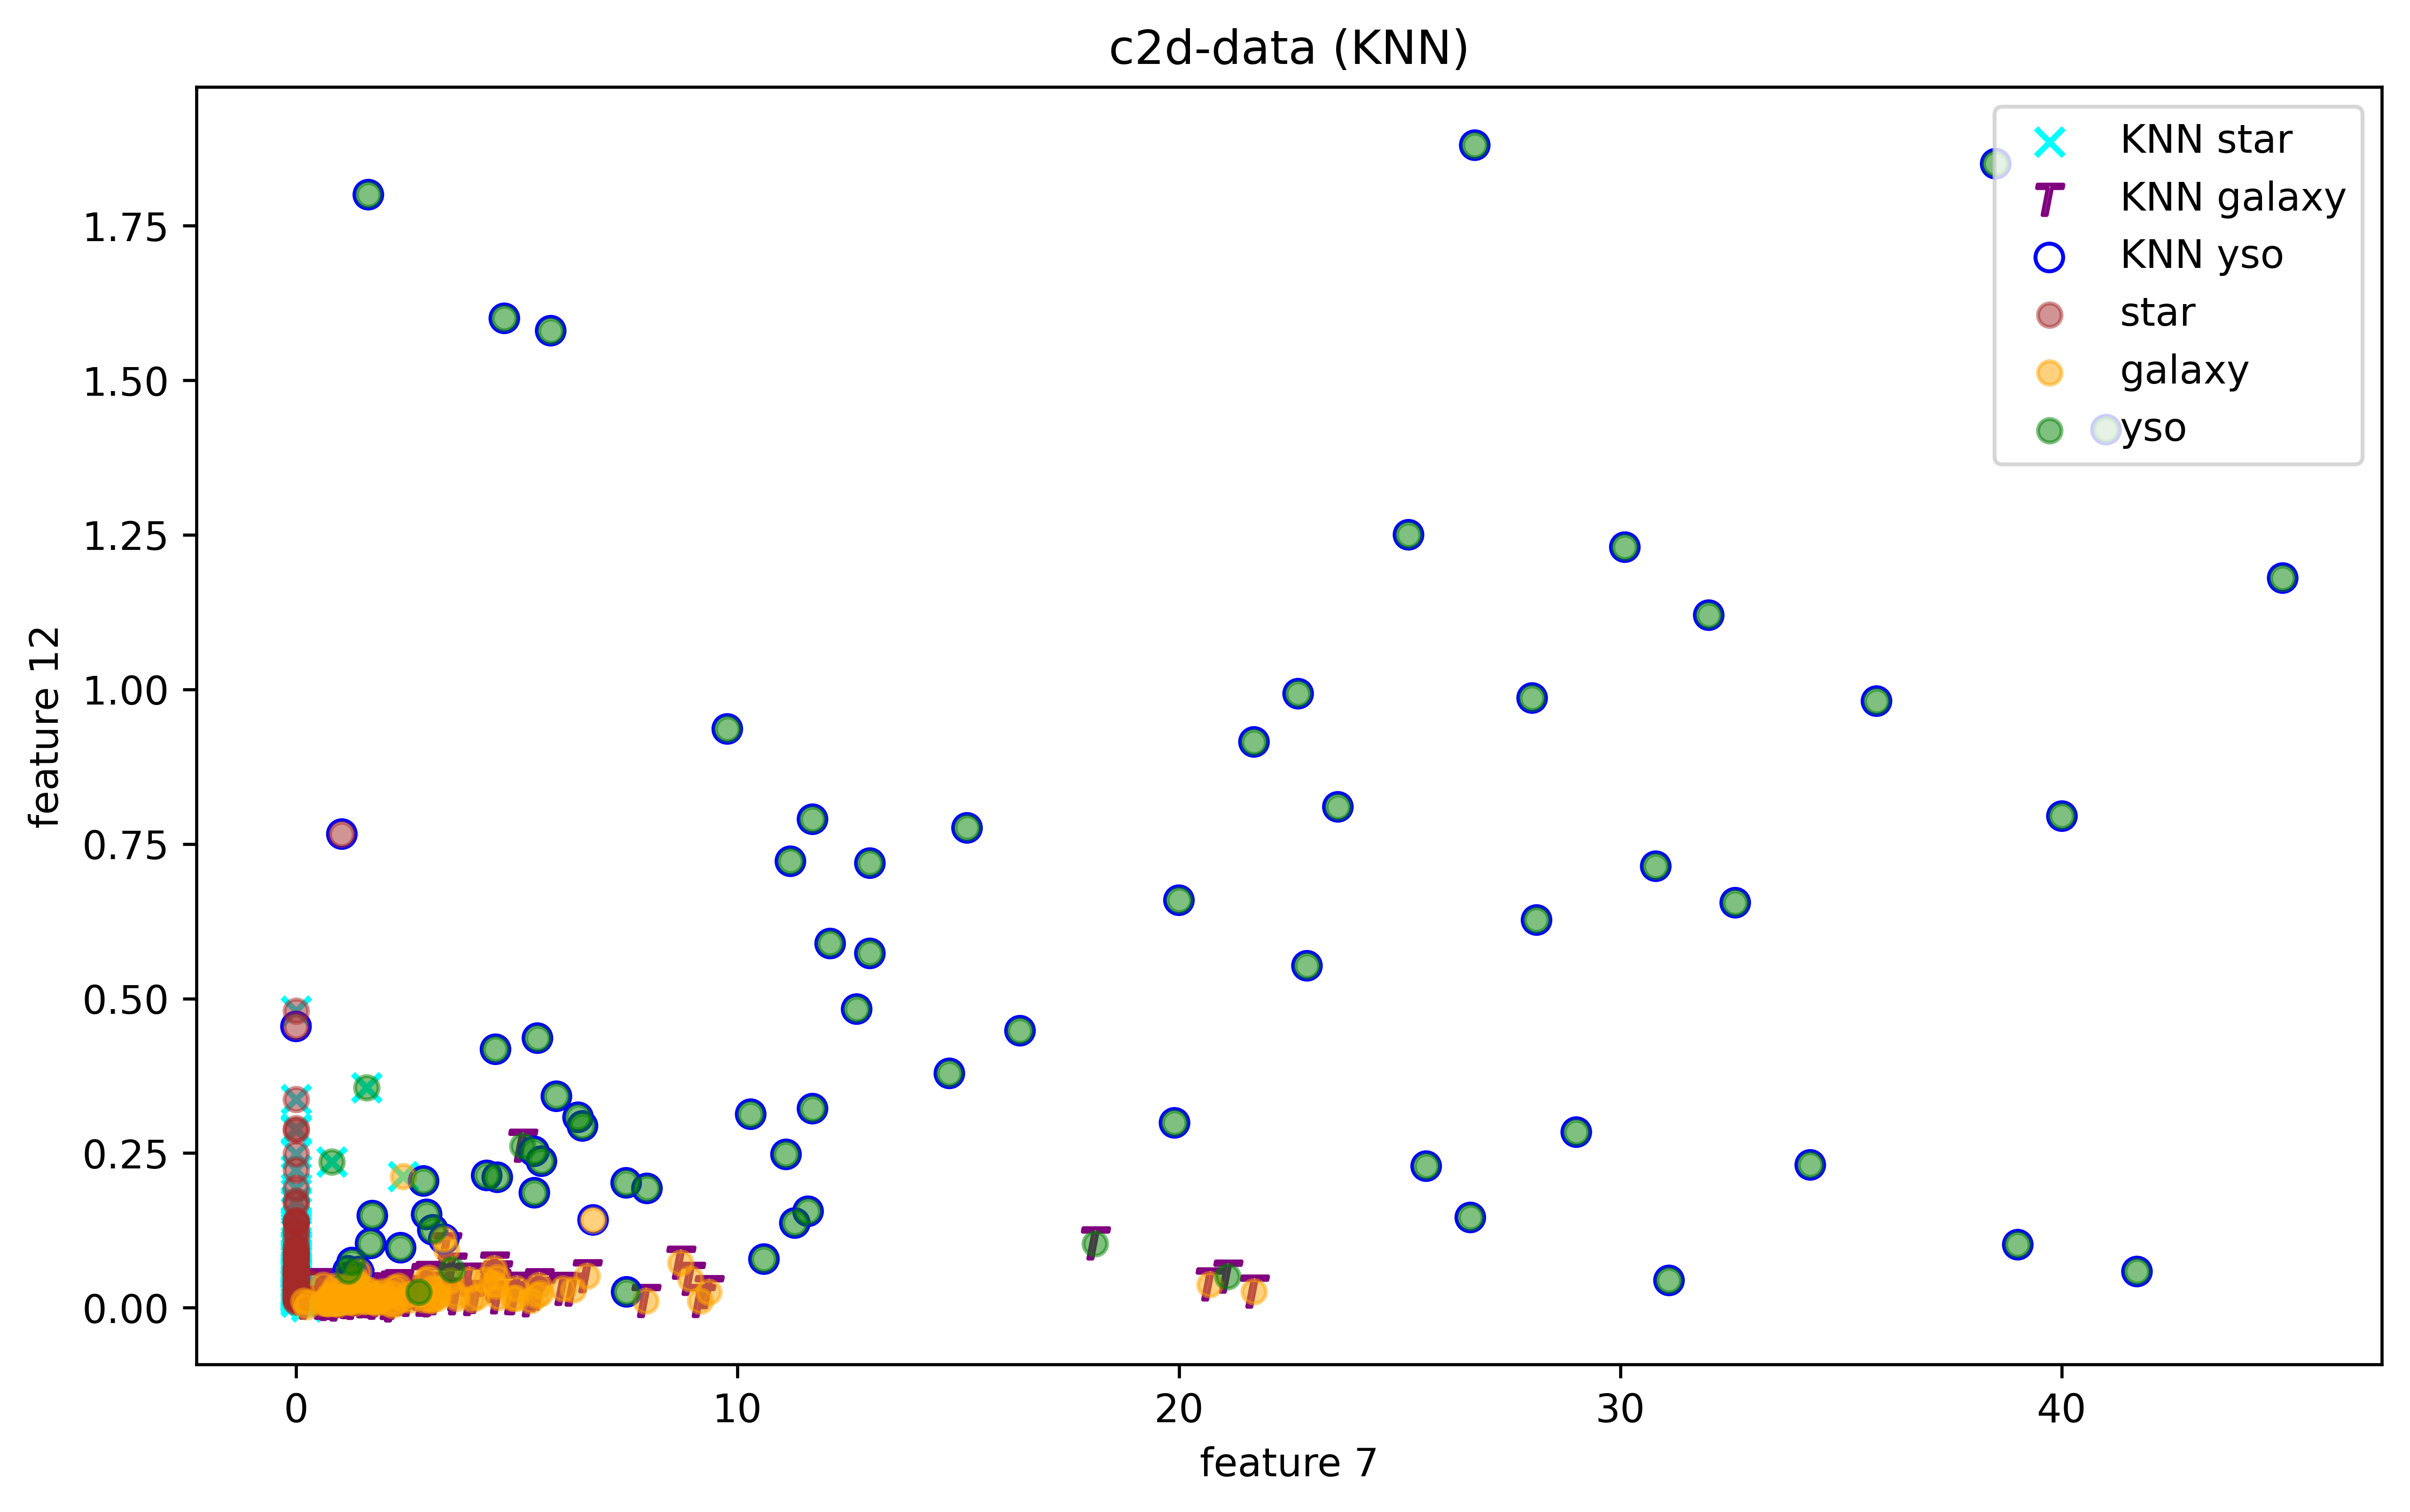

In [11]:
##############################################################################
# Code for 2.2
# 
##############################################################################
# Please code in this cell

fig = plt.figure(figsize=(10,6), dpi=600)  
plt.title("c2d-data (KNN)")

plt.scatter(X_test[:,7][p_test==0], X_test[:,12][p_test==0],s=50,marker='x',c='cyan', label='KNN '+L[0])
plt.scatter(X_test[:,7][p_test==1], X_test[:,12][p_test==1],s=60,marker='$T$',c='none',edgecolors='purple', label='KNN '+L[1])
plt.scatter(X_test[:,7][p_test==2], X_test[:,12][p_test==2],s=50,marker='o',c='none',edgecolors='b', label='KNN '+L[2])
plt.scatter(X_test[:,7][Y_test==0], X_test[:,12][Y_test==0], alpha=.5, color='brown', label=L[0])
plt.scatter(X_test[:,7][Y_test==1], X_test[:,12][Y_test==1], alpha=.5, color='orange', label=L[1])
plt.scatter(X_test[:,7][Y_test==2], X_test[:,12][Y_test==2], alpha=.5, color='g', label=L[2])
plt.xlabel('feature 7')
plt.ylabel('feature 12')
plt.legend(loc='upper right')
plt.show()

##############################################################################

### 2.3  
Discussion  
* Compare the performance of kMeans and kNN.    
    * Describe the difference of the figures.     
---
Please write your discussion in this cell:

Compare the figure of 1.8(Kmean) and 2.2(KNN), we can see that KNN algorithm provides a much better result.<br>
That is because the principle of fitting in KNN is based on each point compares the nearest k numbers of data points, so the model is trained by your nearest neighbors; different from the Kmean that calculate the center of given number of cluster.<br>
So KNN is "clustering"(物以類聚), Kmean is "Classification"(分類).

# Bonus  
* Change k number to see the result.(from 2 to 10)
* k number is the number of how many clusters have to classify.  
* Calculate the silhouette_score by sklearn.metrics package.
* List the silhouette_scores for different k.
* Hint: Use the loop.  
* Plot the bar chart of silhouette_scores.
 
[Ref: sklearn.cluster](https://scikit-learn.org/stable/modules/clustering.html)  
[Ref: sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)  
[Ref: sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)  


silhouette_scores for k=2 0.8541218301799638
silhouette_scores for k=3 0.8008989218631836
silhouette_scores for k=4 0.7470145924685568
silhouette_scores for k=5 0.6898569027653515
silhouette_scores for k=6 0.6852906739080813
silhouette_scores for k=7 0.6473048833679589
silhouette_scores for k=8 0.5943898537230645
silhouette_scores for k=9 0.6151290584321901
silhouette_scores for k=10 0.6640072988662572


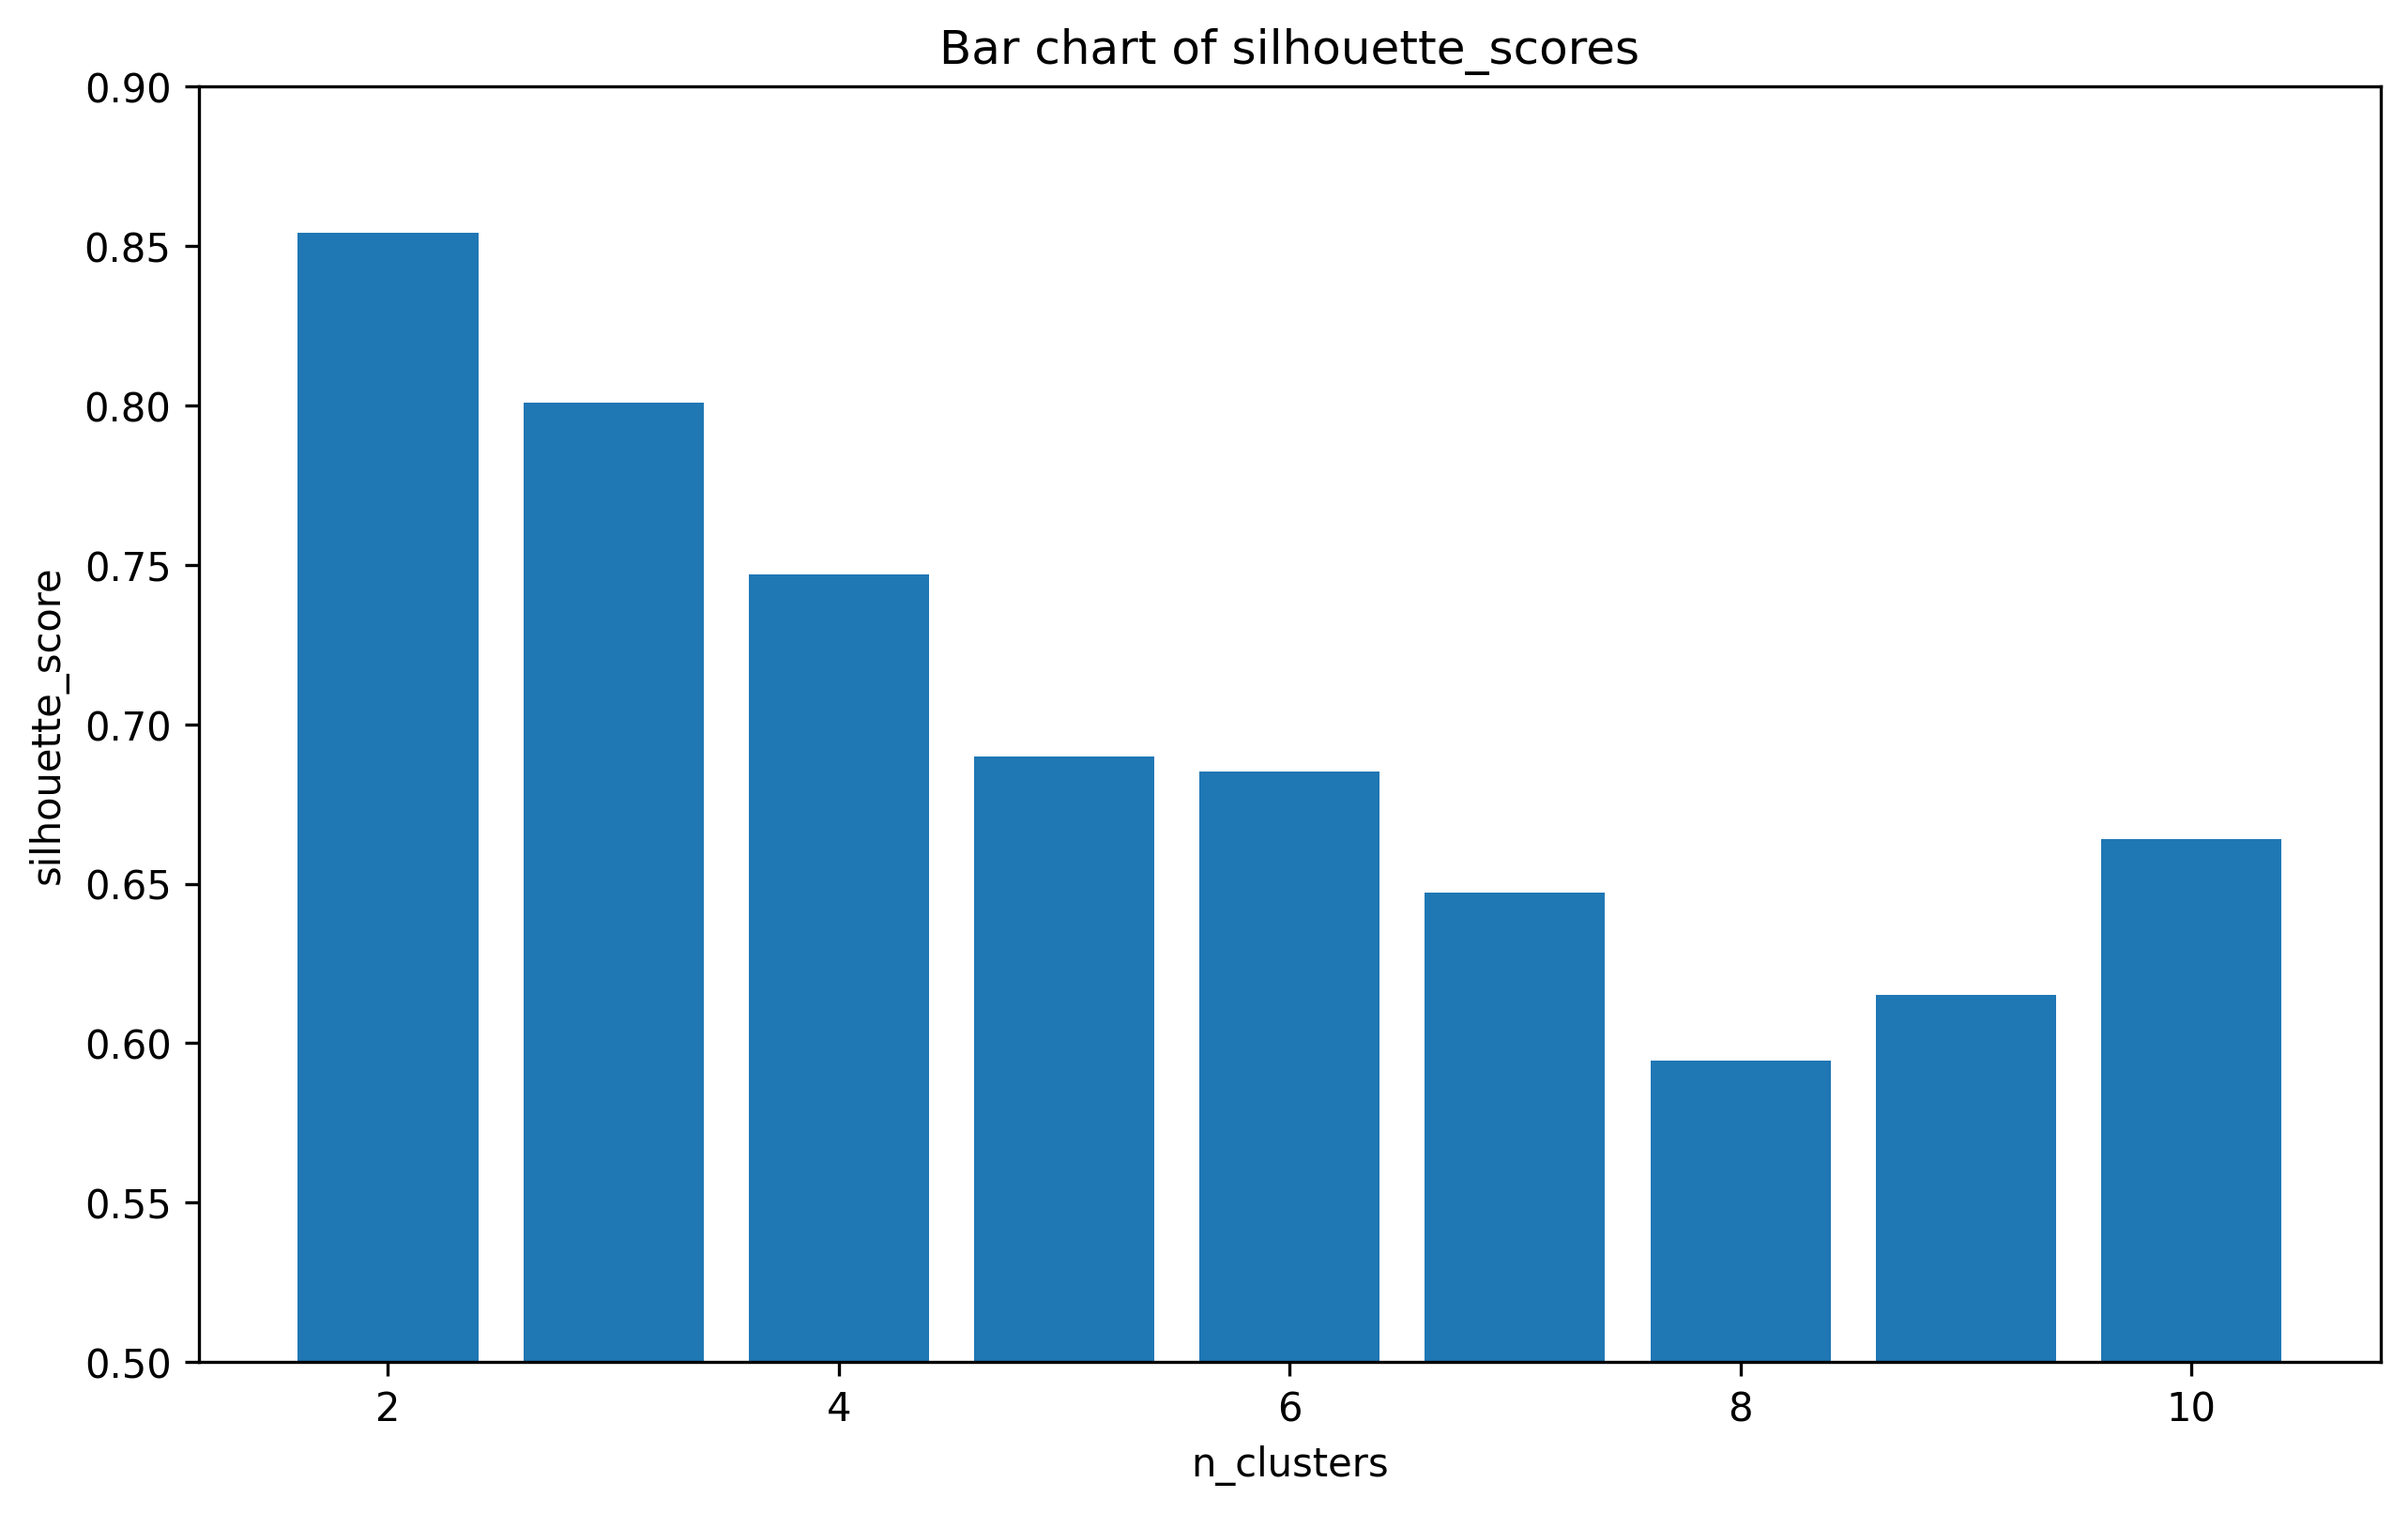

In [12]:
##############################################################################
# Code for bonus
# 
##############################################################################
# Please code in this cell
from sklearn.metrics import silhouette_score

x_train = new_x_data[:,[7,12]]
score = []
# change k number
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(x_train)
    kmean_output = kmeans.labels_
    score.append(silhouette_score(x_train,kmean_output))

for i in range(len(score)):
    print(f"silhouette_scores for k={i+2}", score[i])
    
fig = plt.figure(figsize=(10,6), dpi=300)  
plt.title("Bar chart of silhouette_scores")
plt.bar(range(2,11),score)

plt.xlabel("n_clusters")
plt.ylabel("silhouette_score")

plt.ylim(0.5, 0.9)
plt.show()
##############################################################################